In [189]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [190]:
import numpy as np
import pandas as pd

In [191]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [192]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [193]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [194]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [195]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [196]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [197]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [198]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [199]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

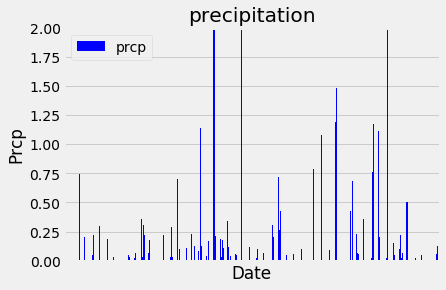

In [226]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()
#session.query(func.count(Measurement.date)).all()

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
query_date = dt.date(2016, 12, 30) - dt.timedelta(days=365)
result_prcps = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > query_date).\
    order_by(Measurement.date).all()
# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(result_prcps)
prcp_df.set_index('date', inplace=True)
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
fig 
prcp_df.plot(kind="bar", facecolor="blue")
plt.title("precipitation")
plt.ylabel("Prcp")
plt.xlabel("Date")
plt.xticks([])
plt.ylim(0,2)
fig.tight_layout()
plt.show()

In [201]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,3336.000000
mean,0.174559
std,0.487085
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,9.640000


In [202]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [203]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [204]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()

[(53.0, 87.0, 73.09795396419437)]

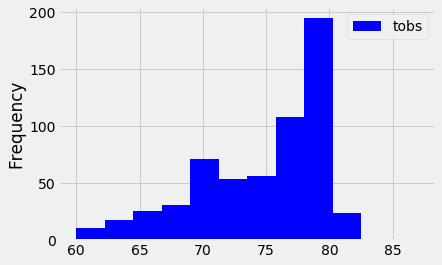

In [295]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.station, func.max(Measurement.tobs)).all()
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
query_date = dt.date(2016, 12, 30) - dt.timedelta(days=365)
 
result_tobs = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519397').\
    filter(Measurement.date > query_date).\
tobs_df = pd.DataFrame(result_tobs)

fig 
tobs_df.plot(kind="hist", facecolor="blue", bins = 12)

plt.ylabel("Frequency")
fig.tight_layout()
plt.show()

In [206]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [207]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2015-12-31', '2017-01-01'))

[(56.0, 74.12413793103448, 84.0)]


/Users/jingduan/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


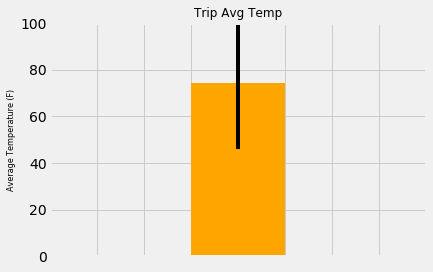

In [208]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
yerr = 84-56
x = 0
y = 74.12413793103448
fig, ax = plt.subplots()
ax.set_ylabel("Average Temperature (F)", fontsize=8)
ax.set_title("Trip Avg Temp", fontsize=12)
ax.bar(x, y, width=0.5, color="orange", yerr=yerr)
ax.set_xlim(-1, 1)
ax.set_ylim(0, 100)
ax.set_xbound(lower=-1, upper=1)
ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off') 
plt.show()

In [233]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
query_date = dt.date(2016, 12, 30) - dt.timedelta(days=365)
 
session.query(Measurement.station, Station.name, func.sum(Measurement.prcp), Station.latitude,Station.longitude,Station.elevation).\
    filter(Measurement.date > query_date ).\
    filter(Measurement.station == Station.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()

[('USC00519397',
  'WAIKIKI 717.2, HI US',
  582.3299999999988,
  21.2716,
  -157.8168,
  3.0)]

## Optional Challenge Assignment

In [300]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [314]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date
start_date = '2017-01-01'
end_date = '2017-01-15'
trip_dates = pd.date_range(start_date, end_date, freq='D')
trip_month_day = trip_dates.strftime('%m-%d')
normals = []
for date in trip_month_day:
    normals.append(*daily_normals(date))
normals

[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0),
 (57.0, 67.16071428571429, 75.0),
 (58.0, 67.9298245614035, 78.0),
 (62.0, 69.74137931034483, 77.0),
 (57.0, 67.3103448275862, 78.0),
 (57.0, 67.4074074074074, 81.0),
 (57.0, 67.25454545454545, 77.0),
 (58.0, 69.52631578947368, 77.0),
 (56.0, 69.31372549019608, 78.0)]

In [317]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, columns=['tmin','tavg','tmax'])
normals_df.set_index(trip_dates, inplace=True)                                            
normals_df.head()

,tmin,tavg,tmax
2017-01-01,62.0,69.153846,77.0
2017-01-02,60.0,69.396226,77.0
2017-01-03,62.0,68.909091,77.0
2017-01-04,58.0,70.000000,76.0
2017-01-05,56.0,67.964286,76.0


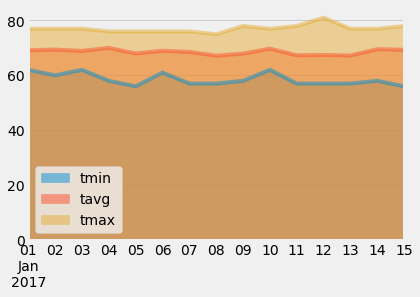

In [326]:
# Plot the daily normals as an area plot with `stacked=False`

ax = normals_df.plot.area(stacked=False)